# Proyek Analisis Data: Nama dataset
- Nama: Farhan Riyandi
- Email: farhanriyandi20@gmail.com
- Id Dicoding: farhan_riyandi_uyhY

## Menentukan Pertanyaan Bisnis

1. Bagaimana peminjaman sepeda perbulan dari tahun 2011-2012?
2. Musim apa yang paling banyak dan paling sedikit dalam peminjaman sepeda pada tahun 2011 dan 2012?
3. Bagaimana jumlah peminjaman sepeda pada setiap cuaca/weather pada 2011 dan 2012?
4. Berapa jumlah peminjam sepeda berdasarkan workingday dan holiday?
5. Jam berapa paling banyak pengguna biasanya meminjam sepeda pada senin-minggu?
6. Apakah ada korelasi antara peningkatan peminjaman sepeda dengan temp, atemp, humadity, windspeed

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

#### Dataset characteristic

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("jumlah duplikasi ",day_df.duplicated().sum())

jumlah duplikasi  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

Pada data day_df seharusnya atribut dteday bertipe datetime, dan disini saya akan mengubah isi dari atribut season, mnth, weekday, weathersit ke nama aslinya agar saat visualisasi data lebih jelas maksudnya.

#### Menilai Data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


pada data hour_df pada kolom dteday harusnya datetime. dan disini saya akan mengubah isi dari atribut season, mnth, weekday, weathersit ke nama aslinya agar saat visualisasi data lebih jelas maksudnya.

### Cleaning Data

### Membersihkan data day_df

#### Memperbaiki Tipe Data

In [11]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
day_df['season'] = day_df['season'].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

day_df['mnth'] = day_df['mnth'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"may", 6:"June", 7:"July", 8:"August", 9:"September",
                                     10:"October", 11:"November", 12: "December"})

day_df['holiday'] = day_df['holiday'].map({0:"No", 1:"Yes"})

day_df['weekday'] = day_df['weekday'].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thrusday", 5:"Friday", 6:"Saturday"})

day_df['workingday'] = day_df['workingday'].map({0:"No", 1:"Yes"})

day_df['weathersit'] = day_df['weathersit'].map({1 :"Clear with few clouds", 2:"Misty or Cloudy", 3: "Light rain or Light snow",
                                                4: "Heavy rain or thick snowfall"})

day_df['yr'] = day_df['yr'].map({0:"2011", 1:"2012"})

In [14]:
columns = ['season', 'mnth', 'holiday','weekday', 'workingday','weathersit', 'yr']

for column in columns:
    day_df[column] = day_df[column].astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No,Saturday,No,Misty or Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,No,Misty or Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Yes,Clear with few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Yes,Clear with few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Yes,Clear with few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

### Membersihkan data hour_df

#### Memperbaiki tipe data

In [16]:
hour_df.drop(columns='instant', inplace=True)

In [17]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [18]:
hour_df['season'] = hour_df['season'].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

hour_df['mnth'] = hour_df['mnth'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"may", 6:"Juny", 7:"July", 8:"August", 9:"September",
                                     10:"October", 11:"November", 12: "December"})

hour_df['holiday'] = hour_df['holiday'].map({0:"No", 1:"Yes"})

hour_df['weekday'] = hour_df['weekday'].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thrusday", 5:"Friday", 6:"Saturday"})

hour_df['workingday'] = hour_df['workingday'].map({0:"No", 1:"Yes"})

hour_df['weathersit'] = hour_df['weathersit'].map({1 :"Clear with few clouds", 2:"Misty or Cloudy", 3: "Light rain or Light snow",
                                                4: "Heavy rain or thick snowfall"})

hour_df['yr'] = hour_df['yr'].map({0:"2011", 1:"2012"})

In [19]:
columns = ['season', 'mnth', 'holiday','weekday', 'workingday','weathersit', 'yr']

for column in columns:
    hour_df[column] = hour_df[column].astype('category')

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear with few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear with few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.75,0.0,0,1,1


save data yang sudah dibersihkan ke file csv 

In [20]:
day_df.to_csv('day_cleaned.csv', index=False)
hour_df.to_csv('hour_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore day_df

In [21]:
day_df.describe(include='all')

C:\Users\farha\AppData\Local\Temp\ipykernel_7032\1011100427.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,August,No,Monday,Yes,Clear with few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Bisa dilihat bahwa pada season nilai yang paling sering muncul adalah Fall, yr 2012, mnth August, holiday No, weekday monday, workingday yes dan weathersit clear with few clouds

In [22]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No,Saturday,No,Misty or Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,No,Misty or Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Yes,Clear with few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Yes,Clear with few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Yes,Clear with few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
day_df.groupby('season').agg({
    'cnt': ['min', 'max', 'mean', 'sum']
})

cnt                            
         min   max         mean      sum
season                                  
Fall    1115  8714  5644.303191  1061129
Spring   431  7836  2604.132597   471348
Summer   795  8362  4992.331522   918589
Winter    22  8555  4728.162921   841613

Dari informasi diatas dapat disimpulkan musim yang paling banyak pengguna meminjam sepeda pada musim Fall dan yang paling sedikit musim spring. Selanjutnya saya akan mengeksplor musim-musim tersebut kebanyakan terjadi pada bulan apa saja

In [24]:
monthly_Fall = day_df[day_df['season'] == 'Fall']
monthly_spring = day_df[day_df['season'] == 'Spring']
monthly_summer = day_df[day_df['season'] == 'Summer']
monthly_winter = day_df[day_df['season'] == 'Winter']

In [25]:
monthly_Fall['mnth'].value_counts()

August       62
July         62
September    44
June         20
April         0
December      0
February      0
January       0
March         0
November      0
October       0
may           0
Name: mnth, dtype: int64

Dapat dilihat musim Fall kebanyakan terjadi pada bulan Juny - September.

In [26]:
monthly_spring['mnth'].value_counts()

January      62
February     57
March        40
December     22
April         0
August        0
July          0
June          0
November      0
October       0
September     0
may           0
Name: mnth, dtype: int64

Dapat dilihat musim spring kebanyakan terjadi pada bulan December - March

In [27]:
monthly_summer['mnth'].value_counts()

may          62
April        60
June         40
March        22
August        0
December      0
February      0
January       0
July          0
November      0
October       0
September     0
Name: mnth, dtype: int64

Dapat dilihat musim summer kebanyakan terjadi pada bulan March - June

In [28]:
monthly_winter['mnth'].value_counts()

October      62
November     60
December     40
September    16
April         0
August        0
February      0
January       0
July          0
June          0
March         0
may           0
Name: mnth, dtype: int64

Dapat dilihat musim winter kebanyakan terjadi pada bulan september - December

Analisis Wheathersit

In [29]:
day_df.groupby('weathersit').agg({
    'cnt': ['min', 'max', 'mean', 'sum']
})

cnt                            
                          min   max         mean      sum
weathersit                                               
Clear with few clouds     431  8714  4876.786177  2257952
Light rain or Light snow   22  4639  1803.285714    37869
Misty or Cloudy           605  8362  4035.862348   996858

Kalau dilihat infromasi diatas jumlah pengguna sepeda paling banyak pada cuaca Clear with few clouds dan paling sedikit pada Light rain or Light snow, selanjutnya saya akan menelaah lebih jauh kebanyakan cuaca tersebut terjadi pada bulan apa	

In [30]:
monthly_few_clouds = day_df[day_df['weathersit'] == 'Clear with few clouds']
monthly_light = day_df[day_df['weathersit'] == 'Light rain or Light snow']
monthly_cloudy = day_df[day_df['weathersit'] == 'Misty or Cloudy']

In [31]:
monthly_few_clouds['mnth'].value_counts()

July         51
June         46
August       43
November     42
April        37
February     37
January      37
may          37
March        36
September    33
December     32
October      32
Name: mnth, dtype: int64

Pada informasi diatas kebanyakan cuaca dengan clear few clouds terjadi pada bulan june, july, august, november 

In [32]:
monthly_light['mnth'].value_counts()

October      5
December     3
November     3
September    3
April        2
March        2
February     1
January      1
July         1
August       0
June         0
may          0
Name: mnth, dtype: int64

Pada informasi diatas kebanyakan cuaca light rain atau light snow terjadi pada bukan october

In [33]:
monthly_cloudy['mnth'].value_counts()

December     27
October      25
may          25
January      24
March        24
September    24
April        21
August       19
February     19
November     15
June         14
July         10
Name: mnth, dtype: int64

pada informasi diatas kebanyakan cuaca misty or cloudy pada bulan december

Selanjutnya saya menganalisis yr atau tahun

In [34]:
working_no = day_df[day_df['workingday'] == 'No']
working_yes = day_df[day_df['workingday'] == 'Yes']

In [35]:
working_yes['weekday'].value_counts()

Tuesday      103
Wednesday    103
Friday       102
Thrusday     102
Monday        90
Saturday       0
Sunday         0
Name: weekday, dtype: int64

Pada informasi diatas hari bekerja/workingday sudah diketahui dari hari monday - friday

In [36]:
working_no['weekday'].value_counts()

Saturday     105
Sunday       105
Monday        15
Friday         2
Thrusday       2
Tuesday        1
Wednesday      1
Name: weekday, dtype: int64

 Pada informasi diatas hari yang bukan bekerja adalah sabtu dan minggu tetapi ada beberpa hari lainnya yang sedikit sebagai hari yang bukan bekerja

In [37]:
day_df.groupby('yr').agg({
    'cnt': ['min', 'max', 'mean', 'count']
})

cnt                         
      min   max         mean count
yr                                
2011  431  6043  3405.761644   365
2012   22  8714  5599.934426   366

Berdasarkan pivot table di atas, dapat diketahui bahwa peminjam sepeda lebih banyak pada tahun 2012.

Selanjutnya saya akan melakukan exploratory data pada kolom numerik 

<AxesSubplot:>

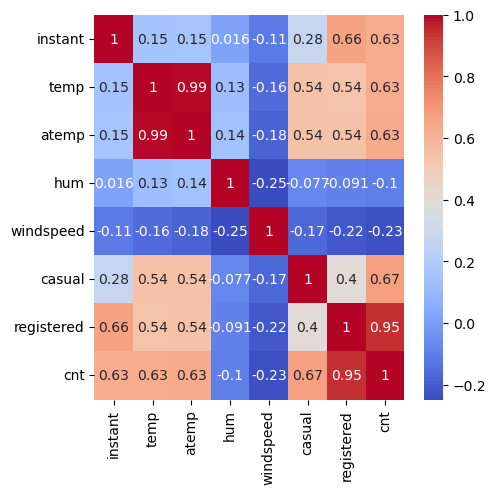

In [38]:
plt.figure(figsize = (5,5)) 
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm' )

bisa disimpulkan temp dan atemp memiliki korelasi yang sangat kuat dan humadity dan windspeed memiliki korelasi yang lemah terhadap kolom lainnya.

### Explore hour_df 

In [54]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear with few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear with few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.75,0.0,0,1,1


In [62]:
hour_df.groupby(['hr'])['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False).head(10)

,hr,cnt
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


Terlihat jam 17 merupakan jam yang paling banyak pengguna meminjam sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana peminjaman sepeda perbulan dari tahun 2011-2012?

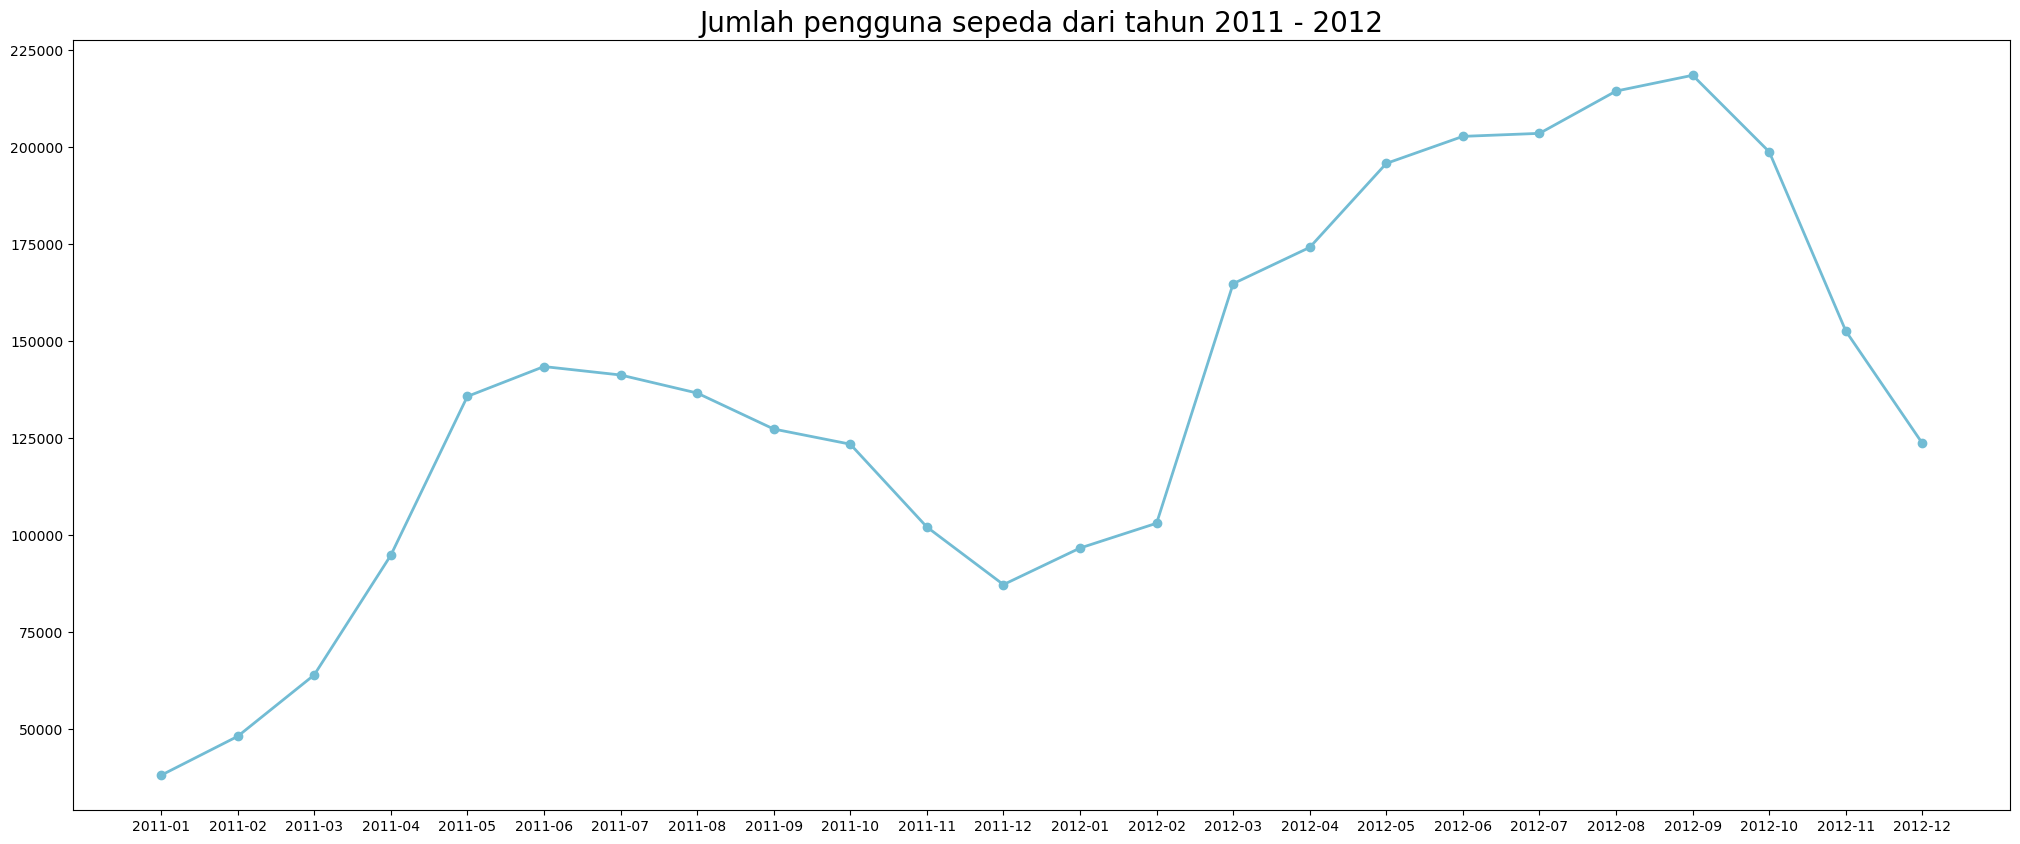

In [39]:
monthly = day_df.resample(rule='M', on='dteday').agg({
    'cnt':'sum'
})
monthly.index = monthly.index.strftime('%Y-%m')
monthly = monthly.reset_index()
plt.figure(figsize=(25, 10))
plt.plot(monthly["dteday"], monthly["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah pengguna sepeda dari tahun 2011 - 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Peminjaman sepeda perbulan tahun 2011 terlihat bahwa pada awal tahun bulan januari-april peminjam sepeda cenderung sedikit, dan kemudian terjadi peningkatan yang signifikan pada bulan mei lalu cenderung lebih banyak peminjaman sepeda pada bulan mei-september, dan pada akhir tahun 2011 bulan november dan desember cenderung menurun. pada tahun 2012 januari - februari cenderung sedikit dan pada bulan maret cenderung pengguna meningkat pesat sampai oktober lalu menurun kembali pada bulan november-desember. Dapat disimpulkan pada akhir tahun 2011 atau 2012 peminjaman sepeda cenderung lebih sedikit pada awal tahun dan akhir tahun, dan peminjaman sepeda cenderung meningkat atau banyak pada pertengahan bulan.

#### Pertanyaan 2
* Musim apa yang paling banyak dan paling sedikit dalam peminjaman sepeda pada tahun 2011 dan 2012?

In [41]:
duaribusebelas =  day_df[day_df['yr'] == '2011'] 
season_duaribusebelas = duaribusebelas.groupby('season')['cnt'].sum().reset_index()
season_duaribusebelas

,season,cnt
0,Fall,419650
1,Spring,150000
2,Summer,347316
3,Winter,326137


In [42]:
duaribu2belas = day_df[day_df['yr'] == '2012'] 
season_duaribu2belas = duaribu2belas.groupby('season')['cnt'].sum().reset_index()
season_duaribu2belas

,season,cnt
0,Fall,641479
1,Spring,321348
2,Summer,571273
3,Winter,515476


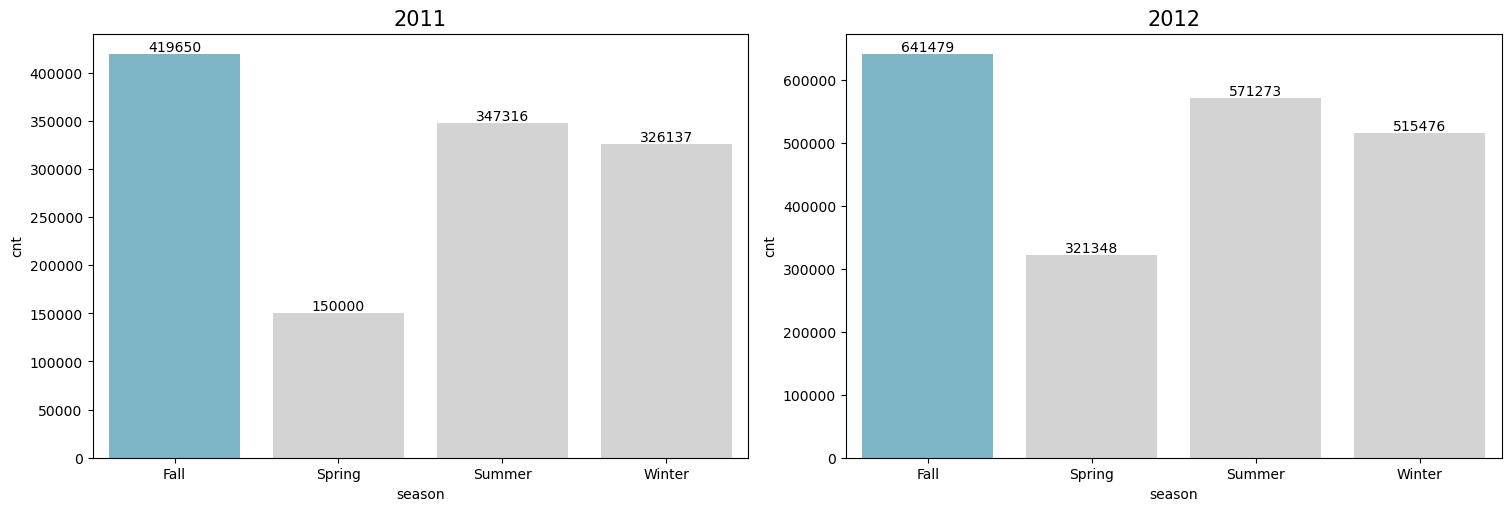

In [43]:
fig = plt.figure(figsize=(15, 5), constrained_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.barplot(data=season_duaribusebelas, x='season', y='cnt', palette=colors,ax=ax1)
ax1.bar_label(ax1.containers[0],fontsize=10)
ax1.set_title("2011", loc="center", fontsize=15)

sns.barplot(data=season_duaribu2belas, x='season', y='cnt', palette=colors,ax=ax2)
ax2.bar_label(ax2.containers[0],fontsize=10)
ax2.ticklabel_format(style='plain', axis='y')  # Menghilangkan notasi ilmiah pada sumbu y
ax2.set_title("2012", loc="center", fontsize=15)

plt.show()

Pada tahun 2011 dan 2012 musim Fall memiliki peminjaman sepeda paling banyak lalu diikuti dengan musim summer dan winter, peminjam sepeda paling sedikit terjadi pada musim spring. 

#### Pertanyaan 3
* Bagaimana jumlah peminjaman sepeda pada setiap cuaca/weather pada 2011 dan 2012?

In [44]:
weather_duaribusebelas = duaribusebelas.groupby('weathersit')['cnt'].sum().reset_index()
weather_duaribusebelas

,weathersit,cnt
0,Clear with few clouds,835067
1,Light rain or Light snow,25112
2,Misty or Cloudy,382924


In [45]:
weather_duaribu2belas = duaribu2belas.groupby('weathersit')['cnt'].sum().reset_index()
weather_duaribu2belas

,weathersit,cnt
0,Clear with few clouds,1422885
1,Light rain or Light snow,12757
2,Misty or Cloudy,613934


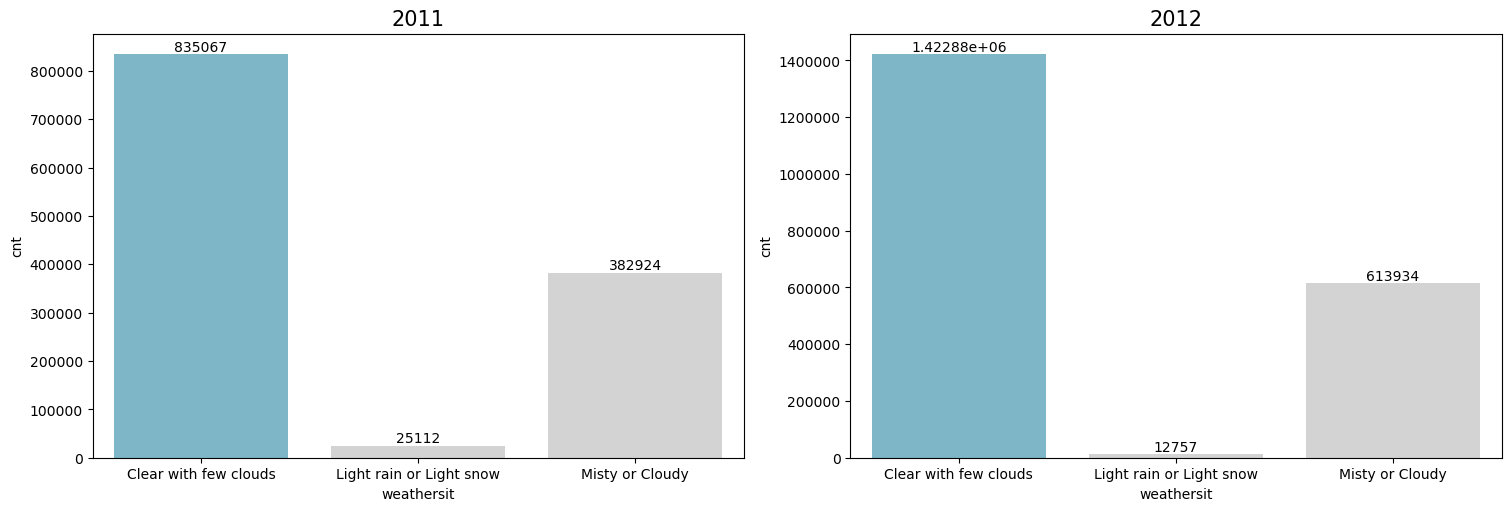

In [46]:
fig = plt.figure(figsize=(15, 5), constrained_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.barplot(data=weather_duaribusebelas.sort_values(by='cnt', ascending=True), x='weathersit', y='cnt', palette=colors,ax=ax1)
ax1.bar_label(ax1.containers[0],fontsize=10)
ax1.set_title("2011", loc="center", fontsize=15)

sns.barplot(data=weather_duaribu2belas.sort_values(by='cnt', ascending=True), x='weathersit', y='cnt', palette=colors,ax=ax2)
ax2.bar_label(ax2.containers[0],fontsize=10)
ax2.ticklabel_format(style='plain', axis='y')  # Menghilangkan notasi ilmiah pada sumbu y
ax2.set_title("2012", loc="center", fontsize=15)

plt.show()

Peminjam sepeda pada kondisi cuaca tahun 2011 dan 2012 memiliki pola yang sama pada cuaca cerah dengan sedikit awan paling banyak pengguna meminjam sepeda diikuti dengan berkabut atau berawan, dan paling sedikit peminjam sepeda pada kondisi cuaca hujan ringan atau salju ringan. pada cuaca cerah dengan sedikit awan 2012 terdapat 1422885, dan cuaca cerah dengan sedikit awan pada 2011 terdapat 835067.Pada berkabut atau berawan pada 2011 terdapat 382924 dan pada 2012 terdapat 613934. dan hujan ringan atau salju ringan pada 2011 terdapat 25112 dan 2012 terdapat 12757.

#### Pertanyaan 4
Berapa jumlah peminjam sepeda berdasarkan workingday dan holiday?

In [47]:
workingday = day_df.groupby('workingday')['cnt'].sum().reset_index()
workingday.sort_values(by='cnt', ascending=True)

,workingday,cnt
0,No,1000269
1,Yes,2292410


In [48]:
holiday = day_df.groupby('holiday')['cnt'].sum().reset_index()
holiday.sort_values(by='cnt', ascending=True)

,holiday,cnt
1,Yes,78435
0,No,3214244


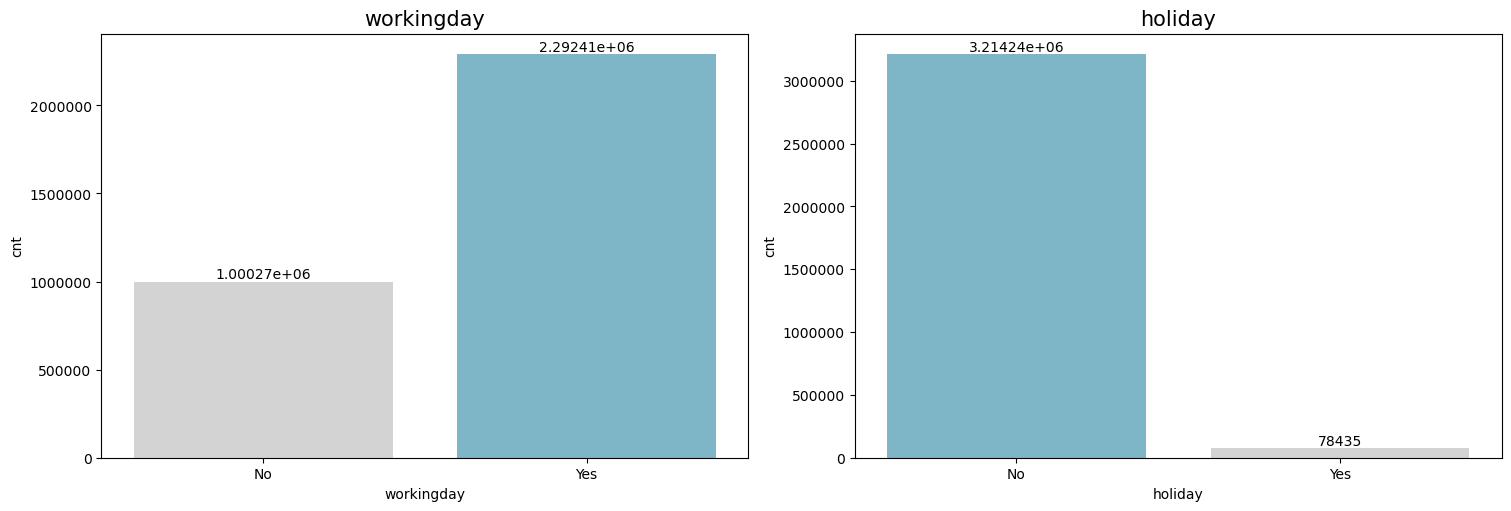

In [49]:
fig = plt.figure(figsize=(15, 5), constrained_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

colors_ = ["#D3D3D3", "#72BCD4"]
colors = ["#72BCD4", "#D3D3D3"]

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.barplot(data=workingday.sort_values(by='cnt', ascending=False), x='workingday', y='cnt', palette=colors_,ax=ax1)
ax1.bar_label(ax1.containers[0],fontsize=10)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title("workingday", loc="center", fontsize=15)

sns.barplot(data=holiday.sort_values(by='cnt', ascending=False), x='holiday', y='cnt', palette=colors,ax=ax2)
ax2.bar_label(ax2.containers[0],fontsize=10)
ax2.ticklabel_format(style='plain', axis='y')  # Menghilangkan notasi ilmiah pada sumbu y
ax2.set_title("holiday", loc="center", fontsize=15)

plt.show()

Jumlah peminjaman sepeda pada workingday lebih banyak yang meminjam pada hari kerja dari pada yang tidak bekerja dengan hari bekerja dengan jumlah 2292410 dan jumlah yang bukan hari bekerja adalah 1000269 dan pada holiday jumlah pengguna sepeda lebih banyak pada yang bukan libur dengan jumlah 3214244 adapun jumlah pada hari libur peminjam sepeda 78435.

#### Pertanyaan 5
Jam berapa paling banyak pengguna biasanya meminjam sepeda pada senin-minggu?  

In [50]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear with few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear with few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear with few clouds,0.24,0.2879,0.75,0.0,0,1,1


In [51]:
weekday_hour =  hour_df.groupby(['hr', 'weekday'])['cnt'].sum().unstack()
weekday_hour.head()

weekday,Friday,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
hr,,,,,,,
0,5453,3571,9902,9775,4045,2790,3594
1,2571,1800,7117,8053,1774,1254,1595
2,1325,1021,5302,6286,934,687,797
3,673,496,2403,3239,497,382,484
4,589,567,804,955,528,508,477


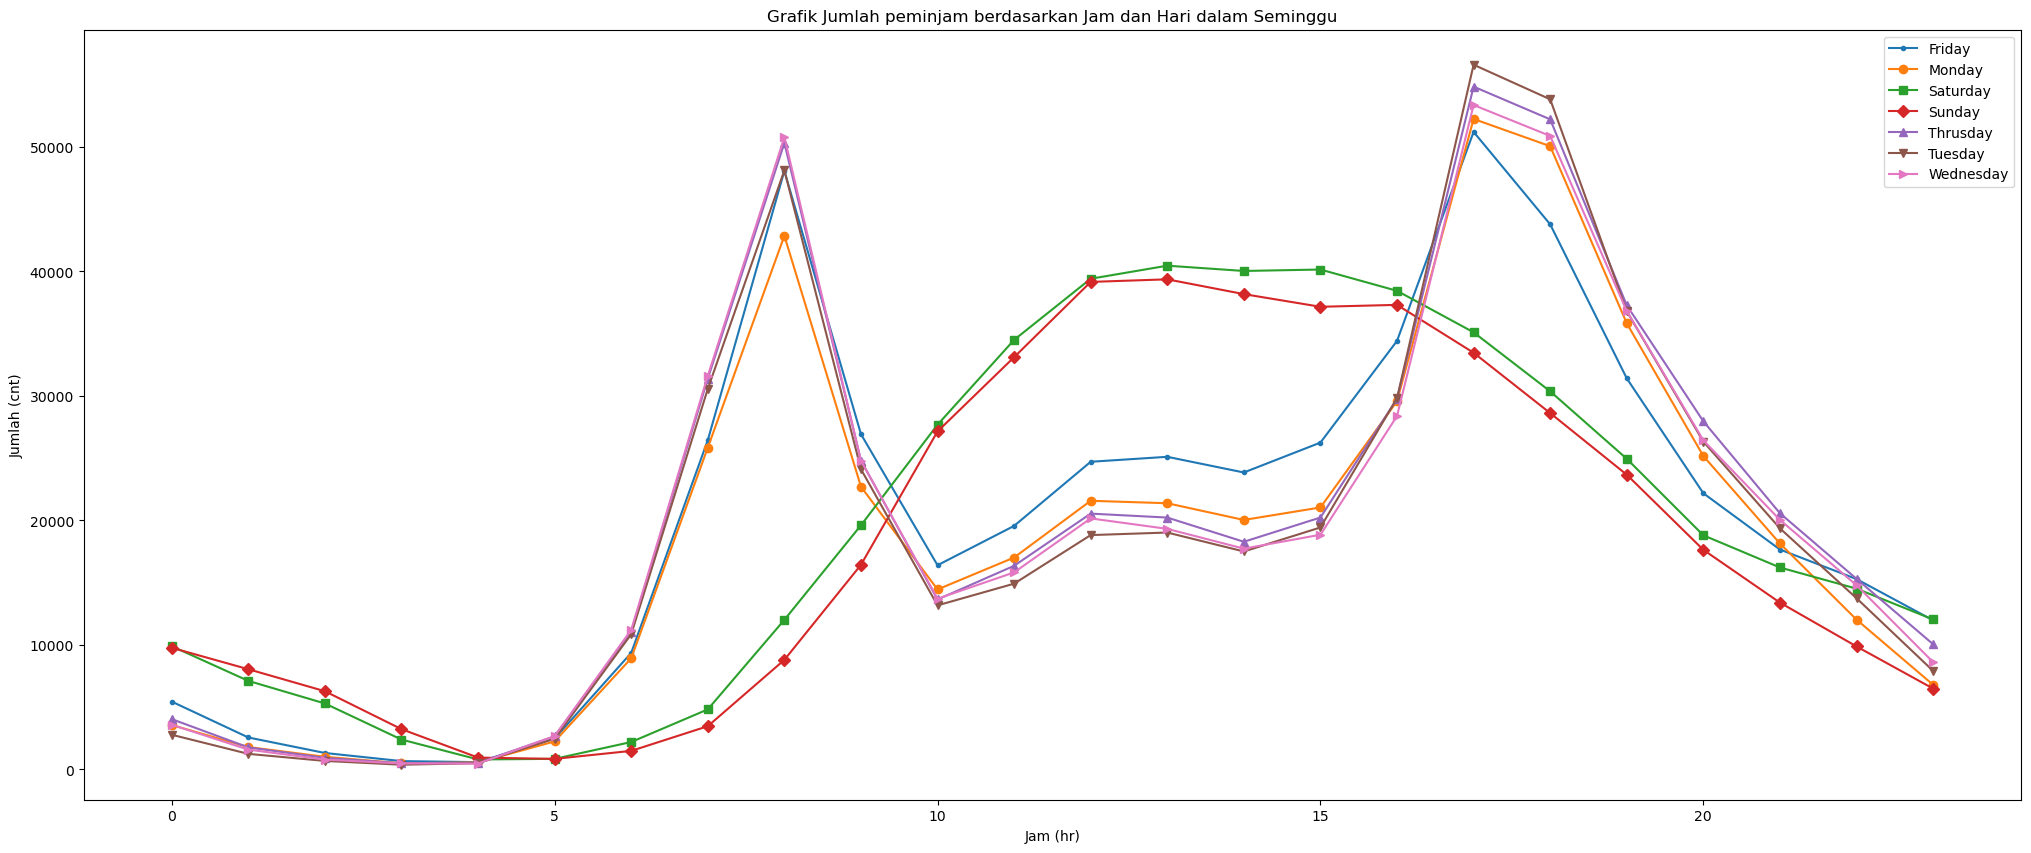

In [52]:
plt.figure(figsize=(25, 10))
markers = ['.', 'o', 's', 'D', '^', 'v', '>']  # Menentukan marker untuk setiap hari dalam seminggu
for i, day in enumerate(weekday_hour.columns):
    plt.plot(weekday_hour.index, weekday_hour[day], marker=markers[i], label=day)

plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah (cnt)')
plt.title('Grafik Jumlah peminjam berdasarkan Jam dan Hari dalam Seminggu')
plt.legend()
# plt.grid(True)
plt.show()

Dapat disimpulkan pada hari monday-friday peminjam sepeda paling banyak ketika jam 17.00, 18.00 dan jam 8. sedangkan pada hari saturday dan sunday paling banyak peminjam sepeda paling banyak pada jam 13.00 

#### Pertanyaan 6
Apakah ada korelasi antara peningkatan peminjaman sepeda dengan temp, atemp, humadity, windspeed

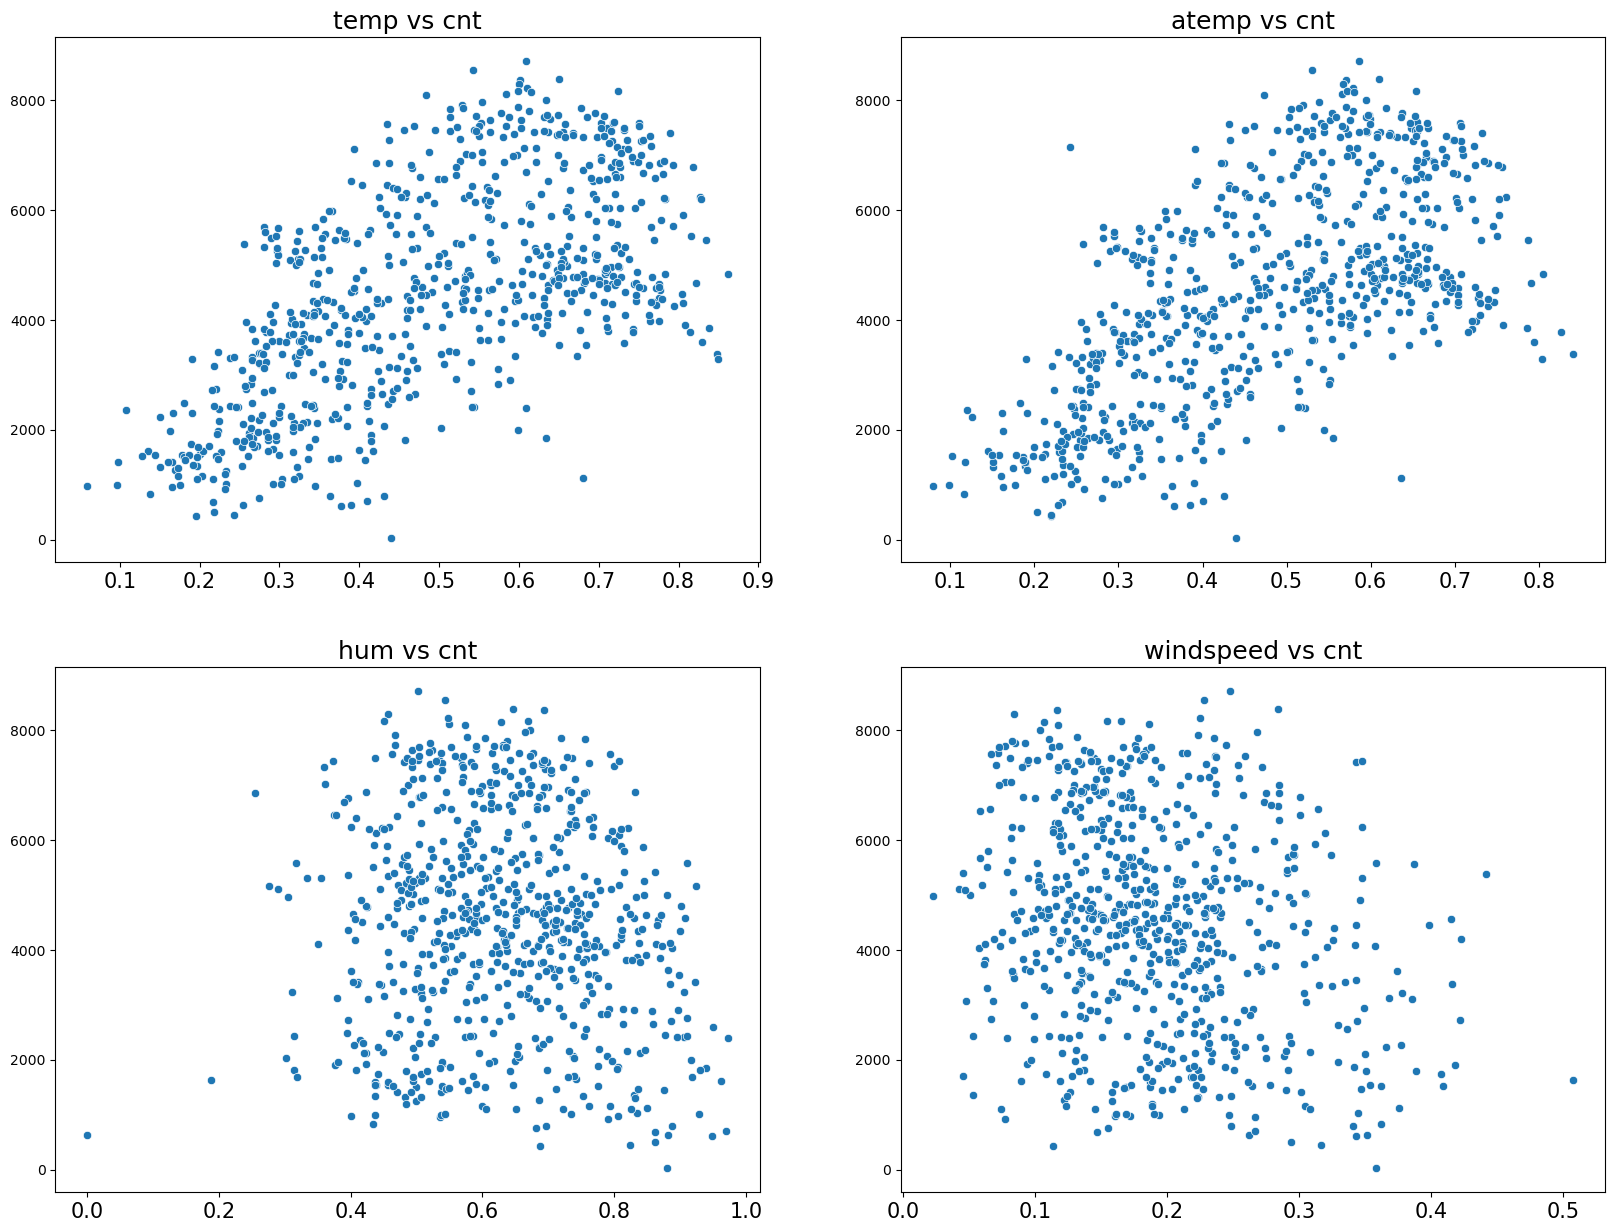

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

sns.scatterplot(data=day_df, x="temp", y="cnt", ax=ax[0, 0])
ax[0, 0].set_ylabel(None)
ax[0, 0].set_xlabel(None)
ax[0, 0].set_title("temp vs cnt", loc="center", fontsize=18)
ax[0, 0].tick_params(axis ='x', labelsize=15)

sns.scatterplot(data=day_df, x="atemp", y="cnt", ax=ax[0, 1])
ax[0, 1].set_ylabel(None)
ax[0, 1].set_xlabel(None)
ax[0, 1].set_title("atemp vs cnt", loc="center", fontsize=18)
ax[0, 1].tick_params(axis ='x', labelsize=15)

sns.scatterplot(data=day_df, x="hum", y="cnt", ax=ax[1, 0])
ax[1, 0].set_ylabel(None)
ax[1, 0].set_xlabel(None)
ax[1, 0].set_title("hum vs cnt", loc="center", fontsize=18)
ax[1, 0].tick_params(axis ='x', labelsize=15)

sns.scatterplot(data=day_df, x="windspeed", y="cnt", ax=ax[1, 1])
ax[1, 1].set_ylabel(None)
ax[1, 1].set_xlabel(None)
ax[1, 1].set_title("windspeed vs cnt", loc="center", fontsize=18)
ax[1, 1].tick_params(axis ='x', labelsize=15)

- Pada temp terhadap cnt memiliki korelasi positif yang cukup kuat
- pada atemp terhadap cnt memiliki korelasi positif yang cukup kuat
- pada humadity terhadap cnt memiliki korelasi negatif tetapi tidak cukup kuat
- pada windspeed terhadap cnt memiliki korelasi negatif tetapi tidak cukup kuat

## Conclusion

- Conclution pertanyaan 1

Peminjaman sepeda perbulan tahun 2011 terlihat bahwa pada awal tahun bulan januari-april peminjam sepeda cenderung sedikit, dan kemudian terjadi peningkatan yang signifikan pada bulan mei lalu cenderung lebih banyak peminjaman sepeda pada bulan mei-september, dan pada akhir tahun 2011 bulan november dan desember cenderung menurun. pada tahun 2012 januari - februari cenderung sedikit dan pada  bulan maret cenderung pengguna meningkat pesat sampai oktober lalu menurun kembali pada bulan november-desember. Dapat disimpulkan pada akhir tahun 2011 atau 2012 peminjaman sepeda cenderung lebih sedikit pada awal tahun dan akhir tahun, dan peminjaman sepeda cenderung meningkat atau banyak pada pertengahan bulan.

- conclution pertanyaan 2

Pada tahun 2011 dan 2012 musim gugur memiliki peminjaman sepeda paling banyak lalu diikuti dengan musim pandas dan musim dingin, peminjam sepeda paling sedikit terjadi pada musim semi.

- conclution pertanyaan 3

Peminjam sepeda pada kondisi cuaca tahun 2011 dan 2012 memiliki pola yang sama pada cuaca cerah dengan sedikit awan paling banyak pengguna meminjam sepeda diikuti dengan berkabut atau berawan, dan paling sedikit peminjam sepeda pada kondisi cuaca hujan ringan atau salju ringan. pada cuaca cerah dengan sedikit awan 2012 terdapat 1422885, dan cuaca cerah dengan sedikit awan pada 2011 terdapat 835067.Pada berkabut atau berawan pada 2011 terdapat 382924 dan pada 2012 terdapat 613934. dan hujan ringan atau salju ringan pada 2011 terdapat 25112 dan 2012 terdapat 12757.

- conclution pertanyaan 4

Jumlah peminjaman sepeda pada workingday lebih banyak yang meminjam pada hari kerja dari pada yang tidak bekerja dengan hari bekerja dengan jumlah 2292410 dan jumlah yang bukan hari bekerja adalah 1000269 dan pada holiday jumlah pengguna sepeda lebih banyak pada yang bukan libur dengan jumlah 3214244 adapun jumlah pada hari libur peminjam sepeda 78435.

- conclution pertanyaan 5

Dapat disimpulkan pada hari monday-friday peminjam sepeda paling banyak ketika jam 17.00, 18.00 dan jam 8. sedangkan pada hari saturday dan sunday paling banyak peminjam sepeda paling banyak pada jam 13.00.

- conclution pertanyaan 6

Pada temp mempunyai korelasi positif yang kuat terhadap cnt jumlah peminjam sepeda, begitu juga pada atemp mempunya korelasi positif yang kuat terhadap cnt jumlah peminjam sepeda. Sedangkan pada hum memilki korelasi negatif yang lemah terhadap cnt dan windspeed juga memiliki korelasi negatif yang lemah terhadap cnt jumlah peminjam sepeda. 